In [4]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [5]:
data=pd.read_excel('E:/vcdata/vcdata(91-17-new).xlsx')
data1=data.replace(0,np.nan)
def getstr(s):
    return str(s)[:4]
data1['get_year'] = data1['投资时间'].map(getstr)

dyj=data1.groupby(["一级名称", "get_year"], as_index=False)['投资金额(RMB)'].count()
dyj2=data1.groupby(["一级名称"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
dEj2=data1.groupby(["二级名称"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
dSj2=data1.groupby(["三级产业名称"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数

In [6]:
len(data['city'])

46775

In [7]:
dyj2=dyj2[1:]
yjsort=dyj2.sort_values(by="投资金额(RMB)" , ascending=False)###根据投资次数进行排序

dEj2=dEj2[1:]
ejsort=dEj2.sort_values(by="投资金额(RMB)" , ascending=False)###根据投资次数进行排序

dSj2=dSj2[0:2].append(dSj2[3:])
sjsort=dSj2.sort_values(by="投资金额(RMB)" , ascending=False)###根据投资次数进行排序

In [8]:
Xdyj=data1.groupby(["一级字母代码", "get_year"], as_index=False)['投资金额(RMB)'].count()
Xdyj2=data1.groupby(["一级字母代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
XdEj2=data1.groupby(["二级代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
XdSj2=data1.groupby(["三级代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数

In [9]:
Xdyj2=Xdyj2[1:]
XdEj2=XdEj2[0:1].append(XdEj2[2:])
XdSj2=XdSj2[1:]

In [10]:
# Xdyj2.to_excel("E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/11.xlsx")
# XdEj2.to_excel("E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/21.xlsx")
# XdSj2.to_excel("E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/31.xlsx")

In [11]:
# ###将一二三级产业投资金额保存下来 ### ,'2-digit','3-digit'
# dyj2.to_excel("E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/1.xlsx")
# dEj2.to_excel("E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/2.xlsx")
# dSj2.to_excel("E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/3.xlsx")

In [12]:
yjName=yjsort['一级名称'].drop_duplicates().values###得到一级产业名称
c=len(yjName)###一级产业数量
a=list(sns.color_palette("hls", c))
yj_color=dict(zip(yjName,a))

In [13]:
###按照排序后的投资数目进行画图，查看一级、二级、三级产业投资情况
def ind_num(data,name1,name2,name3,yj_color,juli,sjcn):  
#     plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
    plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
    fig=plt.figure(figsize=(8,6))
    ax1=fig.add_subplot(1,1,1)
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
    font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 10,
    }###设置横纵坐标的字体格式
    plt.xlabel(name3+' industry rank',font2)
    plt.ylabel('Number of investments',font2)
    plt.tick_params(labelsize=14) #刻度字体大小13
    pFname=data[name1].drop_duplicates().values###产业名称
#     pFname = [ff for ff in pFname if ff!='--']
    YJname=data['一级名称'].values###一级产业名称
    pFirst=data[name2].values###金额
    x=np.arange(1,len(pFname)+1)
    xmajorLocator = MultipleLocator(juli)
    xminorLocator = MultipleLocator(1.0)
    ax1.xaxis.set_major_locator(xmajorLocator)
    ax1.xaxis.set_minor_locator(xminorLocator)
    sj20 = []###排名前20的三级产业名称
    for i in range(len(pFname)):
        plt.bar(x[i],pFirst[i],color=yj_color[YJname[i]])###根据一级产业名称进行描色
        if i<20:
            sj20.append(sjcn[str(pFname[i])])
        plt.legend(sj20 ,loc='upper right',prop=font1)
    
    plt.savefig('E:/vcdata/pic/picSC/Fig1_buchong(三级产业）.pdf', bbox_inches='tight')
    plt.show()

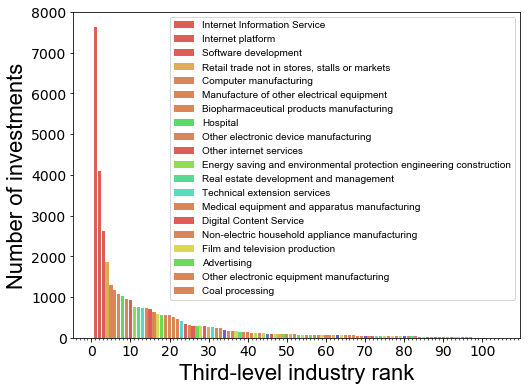

In [12]:
# cityUN=list(set(city2).intersection(set(city))) ###得到两个城市的交集
def d(s):###二三级产业和一级产业对应
    end=Secondary_Industry[s]
    return(end)

sjCE = {'互联网信息服务 ':'Internet Information Service','互联网平台':'Internet platform','软件开发 ':'Software development','货摊、无店铺及其他零售业':'Retail trade not in stores, stalls or markets',
       '计算机制造':'Computer manufacturing','其他电气机械及器材制造':'Manufacture of other electrical equipment','医院 ':'Hospital',
       '生物药品制品制造':'Biopharmaceutical products manufacturing','电子器件制造':'Other electronic device manufacturing','其他互联网服务':'Other internet services',
       '影视节目制作 ':'Film and television production','节能环保工程施工':'Energy saving and environmental protection engineering construction',
       '房地产开发经营 ':'Real estate development and management','技术推广服务 ':'Technical extension services',' 医疗仪器设备及器械制造':'Medical equipment and apparatus manufacturing',
       '技能培训、教育辅助及其他教育':'Skills training, education assistance and other education','数字内容服务 ':'Digital Content Service',
       '非电力家用器具制造':'Non-electric household appliance manufacturing','煤炭加工 ':'Coal processing','广告业 ':'Advertising','其他电子设备制造':'Other electronic equipment manufacturing'}
Secondary_Industry=data.set_index('三级产业名称').to_dict()['一级名称']###将二级产业和一级产业对应，根据一级产业描色
sjsort['一级名称']=sjsort['三级产业名称'].map(d)
ind_num(sjsort,'三级产业名称','投资金额(RMB)','Third-level',yj_color,10,sjCE)

In [13]:
####各产业log(rank-number)进行拟合#####################################3

In [14]:
###按照排序后的投资数目进行画图，查看一级、二级、三级产业投资情况
def log_ind_num(data,name1,name2,name3,yj_color,maxvalue):  
    pFname=data[name1].drop_duplicates().values###产业名称
    YJname=data[name1].values###一级产业名称
    pFirst=np.log10(data[name2].values)###log 金额
    x=np.log10(np.arange(1,len(pFname)+1))
    pFname2=[]
    pFirst2=[]###保留尾巴之前的数据
    x2=[]
    for jj in range(len(x)):
        if x[jj] < maxvalue:
            pFirst2.append(pFirst[jj])
            x2.append(x[jj])
            pFname2.append(pFname[jj])
    return(x2,pFirst2,pFname2,x,pFirst,pFname)

In [15]:
###得到一级产业分布情况
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def pic6(yt):
    yt1=yt[0]
    yt2=yt[1]###过滤掉掉下去的那段
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点

    #读取结果
    k,b=Para[0]
    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 15,
    }###设置横纵坐标的字体格式
    
    #画拟合直线
    y = [k*x+b for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(yt1,yt2,y,k,r,b)

In [16]:
######按照logbin进行拟合#############
###按照排序后的投资数目进行画图，查看一级、二级、三级产业投资情况，得到原始值
def orgal_ind_num(data,name1,name2,name3,yj_color,maxvalue):  
    pFname=data[name1].drop_duplicates().values###产业名称
    YJname=data[name1].values###一级产业名称
    pFirst=data[name2].values###log 金额
    x=np.log10(np.arange(1,len(pFname)+1))
    X = np.arange(1,len(pFname)+1)
    return(X,pFirst,pFname)

In [17]:
YJ=orgal_ind_num(yjsort,'一级名称','投资金额(RMB)','First-level',yj_color,1.1)
SJ=orgal_ind_num(sjsort,'三级产业名称','投资金额(RMB)','Third-level',yj_color,1.9)
bin_n = 10
bin_cut = np.logspace(0,1.9,bin_n)
x=SJ[0]
y=SJ[1]
result = [[] for i in range(bin_n-1)]
bin_0_x = []
bin_0_y = []

for i in range(bin_n - 1):
    score_a = bin_cut[i]
    score_b = bin_cut[i+1]
    x_middle = (score_b - score_a)/2 + score_a
    
    for j in range(len(x)):
        if x[j] > score_a and x[j] < score_b:
            result[i].append(y[j])
    avg = (np.sum(result[i])/(score_b-score_a))
    if avg==0:
        continue
    else:
        bin_0_y.append(avg)
        bin_0_x.append(x_middle)
log_bin_x = np.log10(bin_0_x)
log_bin_y = np.log10(bin_0_y)

In [18]:
# YJ=orgal_ind_num(yjsort,'一级名称','投资金额(RMB)','First-level',yj_color,1.1)
# SJ=orgal_ind_num(sjsort,'三级产业名称','投资金额(RMB)','Third-level',yj_color,1.9)
# ###一二三级产业排名-投资次数shuanglog图
# ###得到一级产业分布情况
# fig=plt.figure(figsize=(7,6))
# font2 = {'family' : 'Arial',
#     'weight' : 'normal',
#     'size' : 22,
#     }###设置横纵坐标的字体格式
# font1 = {'family' : 'Arial',
#     'weight' : 'normal',
#     'size' : 14,
#     }###设置横纵坐标的字体格式
# plt.xlabel('$\log_{10}$'+'(rank)',font2)
# plt.ylabel('$\log_{10}$'+'(# investments)',font2)
# plt.tick_params(labelsize=16) #刻度字体大小13
# YJ=log_ind_num(yjsort,'一级名称','投资金额(RMB)','1-letter',yj_color,1.1)
# plt.plot(YJ[3],YJ[4], alpha=0.3,label='1-letter',linewidth=2)

# EJ=log_ind_num(ejsort,'二级名称','投资金额(RMB)','Second-level',yj_color,1.75)
# plt.plot(EJ[3],EJ[4], alpha=0.6,label='2-digit',linewidth=2)

# # plt.plot(log_bin_x,log_bin_y,color='lime', alpha=0.3)
# YJnihe=pic6([log_bin_x,log_bin_y])
# xxx = np.arange(0,2.25,0.25)

# SJ=log_ind_num(sjsort,'三级产业名称','投资金额(RMB)','Third-level',yj_color,1.9)
# plt.plot(SJ[3],SJ[4],alpha=0.8,label='3-digit',linewidth=2)
# plt.plot(xxx,[YJnihe[3]*xx+YJnihe[5] for xx in xxx], linewidth=2, linestyle='--')
# plt.text(0.5,1.8,r'$slope={} $'.format(round(YJnihe[3], 2)),size=14)
# plt.plot([0.5,1],[2.1,2.1],color='red',linewidth=3)
# plt.plot([0.5,0.5],[2.1,2.8],color='red',linewidth=3)
# plt.legend(prop=font1)
# # plt.savefig('E:/文档系列/python 系列/picScalling/Fig1c.pdf', bbox_inches='tight')

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


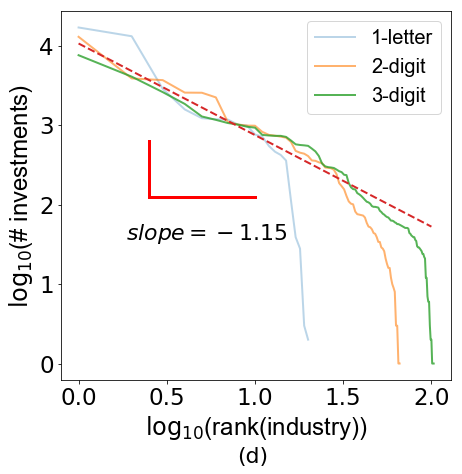

In [31]:

###一二三级产业排名-投资次数shuanglog图
###得到一级产业分布情况
# fig=plt.figure(figsize=(7,6))
fig=plt.figure(figsize=(7,6.8))
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 24,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }###设置横纵坐标的字体格式log_{10}(rank(industry))
plt.xlabel('$\log_{10}$'+'(rank(industry))',font2)
plt.ylabel('$\log_{10}$'+'(# investments)',font2)
plt.tick_params(labelsize=23) #刻度字体大小13
YJ=log_ind_num(yjsort,'一级名称','投资金额(RMB)','1-letter',yj_color,1.1)
plt.plot(YJ[3],YJ[4], alpha=0.3,label='1-letter',linewidth=2)

EJ=log_ind_num(ejsort,'二级名称','投资金额(RMB)','Second-level',yj_color,1.75)
plt.plot(EJ[3],EJ[4], alpha=0.6,label='2-digit',linewidth=2)

# plt.plot(log_bin_x,log_bin_y,color='lime', alpha=0.3)
YJnihe=pic6([log_bin_x,log_bin_y])
xxx = np.arange(0,2.25,0.25)

SJ=log_ind_num(sjsort,'三级产业名称','投资金额(RMB)','Third-level',yj_color,1.9)
plt.plot(SJ[3],SJ[4],alpha=0.8,label='3-digit',linewidth=2)
plt.plot(xxx,[YJnihe[3]*xx+YJnihe[5] for xx in xxx], linewidth=2, linestyle='--')
plt.text(0.27,1.55,r'$slope={} $'.format(round(YJnihe[3], 2)),size=22)
plt.plot([0.4,1],[2.1,2.1],color='red',linewidth=3)
plt.plot([0.4,0.4],[2.1,2.8],color='red',linewidth=3)
# plt.text(-0.1,4.6,'(d)',size=8)
plt.text(0.9,-1.25,'(d)',size=22)
plt.legend(prop=font1)
# plt.savefig('E:/vcdata/pic/picSC/Fig1c.pdf', bbox_inches='tight')
plt.savefig('E:/0论文/2picture/2_5d.png',dpi=300, bbox_inches='tight')

In [22]:
len(SJ[0])

79

In [32]:
######### 1b ########
######## 每年投资产业种类 ###########

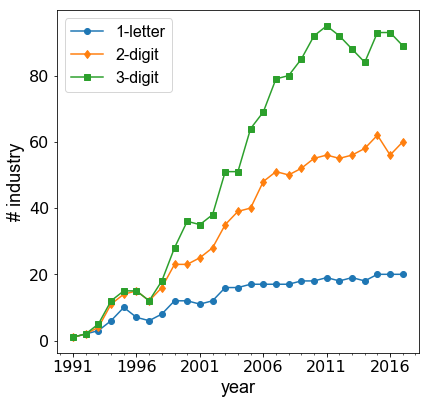

In [36]:
###每年产业的数量
def ind_number(data,name):
    la=[data[name].drop_duplicates().values[l] for l in range(17)]
    la1=[x for x in la if x!='--']
    gg=data.groupby(['get_year'], as_index=False)
    number=[]
    for g in gg:
        y=g[1][name].drop_duplicates().values
        number.append(len(y))
    return(number)

fig=plt.figure(figsize=(6.5,6.3))
ax1=fig.add_subplot(1,1,1)
yearsL = list(map(str,list(range(1991,2018))))
xmajorLocator = MultipleLocator(5)
xminorLocator = MultipleLocator(1.0)###设置刻度
font2 = {'family' : 'Arial',
            'weight' : 'normal',
            'size' : 18,
            }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
            'weight' : 'normal',
            'size' : 16,
            }###设置横纵坐标的字体格式
plt.tick_params(labelsize=16) #刻度字体大小13
plt.xlabel('year',font2)
plt.ylabel('# industry',font2)

yYJ=ind_number(data1,'一级名称')
yER=ind_number(data1,'二级名称')
ySJ=ind_number(data1,'三级产业名称')
plt.plot(yearsL,yYJ,marker='o',label='1-letter')
plt.plot(yearsL,yER,marker='d',label='2-digit')
plt.plot(yearsL,ySJ,marker='s',label='3-digit')
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.legend(loc='upper left',prop=font1)
# plt.savefig('E:/vcdata/pic/picSC/Fig1b.pdf', bbox_inches='tight')
plt.savefig('E:/0论文/1picture/2_3.png',dpi=300, bbox_inches='tight')

In [24]:
len(yYJ),len(yER),len(ySJ)

(27, 27, 27)

In [69]:
dfyj = pd.DataFrame(columns=['year','1-letter','2-digit','3-digit'])
dfyj['year'] = yearsL
dfyj['1-letter'] = yYJ
dfyj['2-digit'] = yER
dfyj['3-digit'] = ySJ
dfyj.to_excel("E:/vcdata/data/Total number of investment industries from 1991 to 2017.xlsx")